## 1. Import different required library

In [1]:
'''Importing libraries and functions that we will be using'''

import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Check the version of Library

In [3]:
'''Checking versions of the libraries'''

print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)

1.0.5
1.18.5
0.23.1


In [4]:
os.chdir('C:\\Users\\shoun\\Downloads')
data = pd.read_csv('creditcard.csv')

## 3. Go for different observation like Info, description

In [5]:
'''Observation of Info'''

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
'''Observation of Description'''

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


## 4. Check for Null Values

In [7]:
'''Check for any null value'''

data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

## 5. Check for Duplicate Values

In [8]:
'''Check for duplicate values'''
print(data.duplicated().any())
print(data['Time'].duplicated().any())
print(data['Class'].duplicated().any())
print(data['V27'].duplicated().any())
print(data['V22'].is_unique)             #Checking for unique value. Since it has come as False, 
                                         #values are not unique and are repeated i.e. duplicates

True
True
True
True
False


## 6. Filter for different condition - come up with insights from the dataset , basic plot , distribution plots

In [9]:
'''Filtering for unique values'''

data.drop_duplicates('Time',keep = 'first')         #Filtering as per Time column

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,'0'
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,'0'
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,'0'
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,'0'
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,'0'


In [10]:
"""Filtering only positive values of V2"""
V2_Positive = data[data['V2'] > 0]             

In [11]:
print(V2_Positive)

print('Insight:  150589 cases where V2 is positive')

            Time         V1         V2        V3        V4        V5  \
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
...          ...        ...        ...       ...       ...       ...   
284797  172782.0  -0.241923   0.712247  0.399806 -0.463406  0.244531   
284798  172782.0   0.219529   0.881246 -0.635891  0.960928 -0.152971   
284801  172785.0   0.120316   0.931005 -0.546012 -0.745097  1.130314   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   

              V6        V7        V8        V9  ...       V21       V22  \
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.22577

In [12]:
'''Filtering for Odd Values of Amount'''
odd = data[data['Amount']%2 == 1]
odd

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
19,15.0,1.492936,-1.029346,0.454795,-1.438026,-1.555434,-0.720961,-1.080664,-0.053127,-1.978682,...,-0.177650,-0.175074,0.040002,0.295814,0.332931,-0.220385,0.022298,0.007602,5.0,'0'
28,23.0,-0.414289,0.905437,1.727453,1.473471,0.007443,-0.200331,0.740228,-0.029247,-0.593392,...,0.077237,0.457331,-0.038500,0.642522,-0.183891,-0.277464,0.182687,0.152665,33.0,'0'
69,46.0,-1.923213,-0.870482,2.320170,1.988776,0.417091,-0.380014,0.472139,-0.557333,-0.649079,...,-0.686488,-0.779268,1.086055,0.518863,-0.363712,3.065576,-0.589022,-0.396110,35.0,'0'
108,73.0,1.162281,1.248178,-1.581317,1.475024,1.138357,-1.020373,0.638387,-0.136762,-0.805505,...,-0.124012,-0.227150,-0.199185,-0.289757,0.776244,-0.283950,0.056747,0.084706,1.0,'0'
109,73.0,1.239048,0.293284,0.086472,1.178277,0.373344,0.325596,0.119319,-0.025476,0.173211,...,-0.148136,-0.111893,-0.173207,-0.714729,0.817360,-0.263843,0.047777,0.008735,1.0,'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284774,172762.0,-0.725459,0.194981,-1.785571,-3.779860,2.177420,2.975713,-0.239695,0.912303,-3.159994,...,0.046103,0.102480,-0.461027,0.717647,1.253036,0.207138,-0.630549,-0.163911,7.0,'0'
284777,172764.0,2.079137,-0.028723,-1.343392,0.358000,-0.045791,-1.345452,0.227476,-0.378355,0.665911,...,0.235758,0.829758,-0.002063,0.001344,0.262183,-0.105327,-0.022363,-0.060283,1.0,'0'
284779,172766.0,1.975178,-0.616244,-2.628295,-0.406246,2.327804,3.664740,-0.533297,0.842937,1.128798,...,0.086043,0.543613,-0.032129,0.768379,0.477688,-0.031833,0.014151,-0.066542,25.0,'0'
284781,172766.0,-1.139015,-0.155510,1.894478,-1.138957,1.451777,0.093598,0.191353,0.092211,-0.062621,...,-0.191027,-0.631658,-0.147249,0.212931,0.354257,-0.241068,-0.161717,-0.149188,13.0,'0'


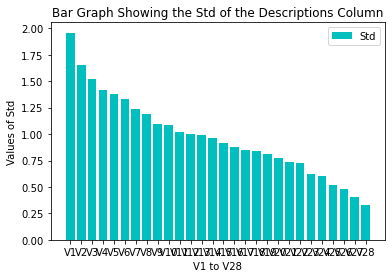

In [13]:
'''Plotting Graphs'''
details = data.describe()
dh = details.iloc[2]
dh
yh1 = np.array(dh)
yh2 = np.delete(yh1,-1)
yh = np.delete(yh2,0)
xh1 = np.array(data.columns)
xh2 = np.delete(xh1, -1)
xh3 = np.delete(xh2, -1)
xh = np.delete(xh3,0)

plt.bar(xh,yh,label = 'Std', color = 'c')
plt.title('Bar Graph Showing the Std of the Descriptions Column')
plt.xlabel('V1 to V28')
plt.ylabel('Values of Std')
plt.legend()
plt.show()

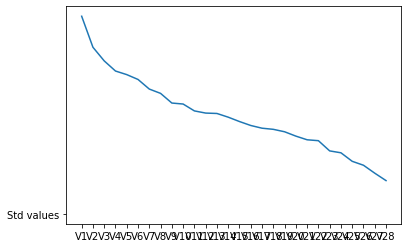

In [14]:
plt.plot(xh, yh, '-', 'Std values')

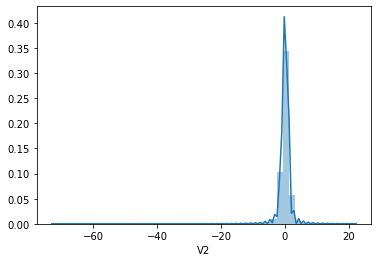

In [31]:
'''Basic Plot'''
sns.distplot(data['V2'])

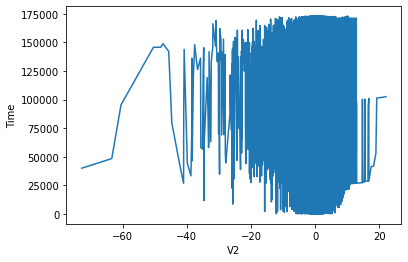

In [37]:
'''Line Plot of V2 against Time'''

sns.lineplot(data['V2'],data['Time'])

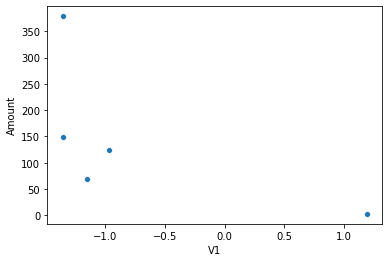

In [46]:
'''Scatter Plot'''
data_head = data.head()

sns.scatterplot(data_head['V1'], data_head['Amount'])

## 7. Use a histogram to plot different columns

(array([3., 3., 3., 3., 3., 3., 3., 3., 3., 4.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

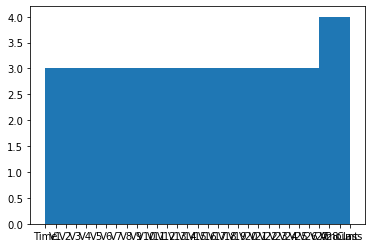

In [15]:
'''Histogram of Columns'''
plt.hist(data.columns)

(array([284315.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

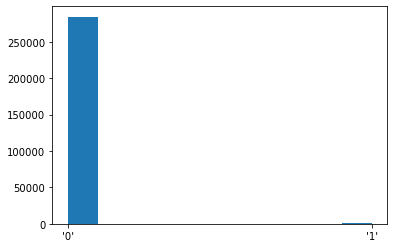

In [16]:
plt.hist(data['Class'])

(array([10510., 16955., 38526., 38550., 40243., 10145., 17161., 38951.,
        40779., 32987.]),
 array([     0. ,  17279.2,  34558.4,  51837.6,  69116.8,  86396. ,
        103675.2, 120954.4, 138233.6, 155512.8, 172792. ]),
 <a list of 10 Patch objects>)

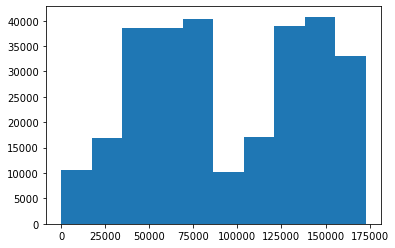

In [17]:
plt.hist(data['Time'])

# Proceeding with Modelling and Checking the accuracy of the model

In [18]:
x = data.iloc[:,:-1]
y = data['Class']

In [19]:
data.shape

(284807, 31)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.3, random_state = 5)

In [21]:
lr = LogisticRegression()
lr.fit(x,y)

C:\Users\shoun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = lr.predict(x_test)

In [23]:
acc = accuracy_score(y_pred,y_test)
acc

0.9989817773252344